#Aula 3.2(2) Regressão: Dataset Boston Housing

Objetivo: Prever o preço de casas em Boston (regressão).

Passos:
1. Carregamento e Exploração dos Dados
2. Pré-processamento
3. Treinamento de Modelos: modelo base: Regressão Linear; modelos avançados: Random Forest Regressor e XGBoost.
4. Visualização dos Resultados

## Roteiro de execução

1. Carregamento e Exploração dos Dados

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


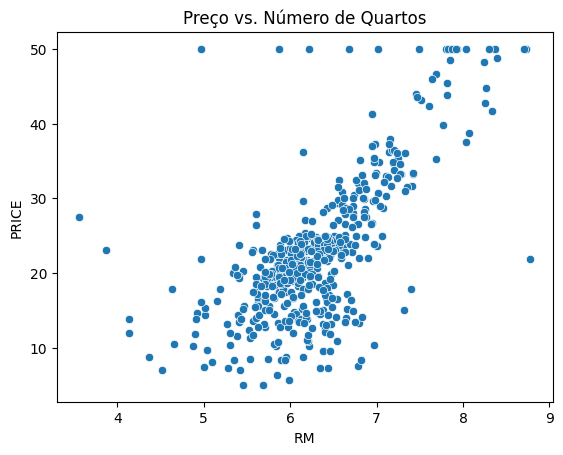

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Baixar o dataset da fonte original
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Criar o DataFrame
df = pd.DataFrame(data, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])
df['PRICE'] = target

# Visualizar
print(df.head())
sns.scatterplot(x='RM', y='PRICE', data=df)
plt.title('Preço vs. Número de Quartos')
plt.show()

2. Pré-processamento

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Aplicando transformação logarítmica à variável alvo
df['PRICE'] = np.log1p(df['PRICE'])

# Separar variáveis
X = df.drop('PRICE', axis=1)
y = df['PRICE']

# Verificar valores ausentes
print("Valores ausentes em X:\n", X.isna().sum())

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar o resultado
print("Primeiras 5 linhas de X_train_scaled:\n", X_train_scaled[:5])

Valores ausentes em X:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64
Primeiras 5 linhas de X_train_scaled:
 [[ 1.28770177 -0.50032012  1.03323679 -0.27808871  0.48925206 -1.42806858
   1.02801516 -0.80217296  1.70689143  1.57843444  0.84534281 -0.07433689
   1.75350503]
 [-0.33638447 -0.50032012 -0.41315956 -0.27808871 -0.15723342 -0.68008655
  -0.43119908  0.32434893 -0.62435988 -0.58464788  1.20474139  0.4301838
  -0.5614742 ]
 [-0.40325332  1.01327135 -0.71521823 -0.27808871 -1.00872286 -0.40206304
  -1.6185989   1.3306972  -0.97404758 -0.60272378 -0.63717631  0.06529747
  -0.65159505]
 [ 0.38822983 -0.50032012  1.03323679 -0.27808871  0.48925206 -0.30045039
   0.59168149 -0.8392398   1.70689143  1.57843444  0.84534281 -3.86819251
   1.52538664]
 [-0.32528234 -0.50032012 -0.41315956 -0.27808871 -0.15723342 -0.83109424
   0.03374663 -0.00549428 -0.6

3. Treinamento de Modelos
- Modelo base: Regressão Linear.
- Modelos avançados: Random Forest Regressor e XGBoost.

In [4]:
from sklearn.model_selection import train_test_split  # Importação adicionada
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

X_train = X_train_scaled  # Assign X_train_scaled to X_train
X_test = X_test_scaled  # Assign X_test_scaled to X_test

# Regressão Linear
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("MAE Regressão Linear:", mean_absolute_error(y_test, y_pred_lr))
print("R² Regressão Linear:", r2_score(y_test, y_pred_lr))

# Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
print("MAE Random Forest:", mean_absolute_error(y_test, y_pred_rfr))
print("R² Random Forest:", r2_score(y_test, y_pred_rfr))

# XGBoost
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("MAE XGBoost:", mean_absolute_error(y_test, y_pred_xgb))
print("R² XGBoost:", r2_score(y_test, y_pred_xgb))

MAE Regressão Linear: 0.1259922971513175
R² Regressão Linear: 0.7452847696576534
MAE Random Forest: 0.1014000116532893
R² Random Forest: 0.8404453767502595
MAE XGBoost: 0.10447702030182286
R² XGBoost: 0.8463257559894972


4. Visualização dos Resultados

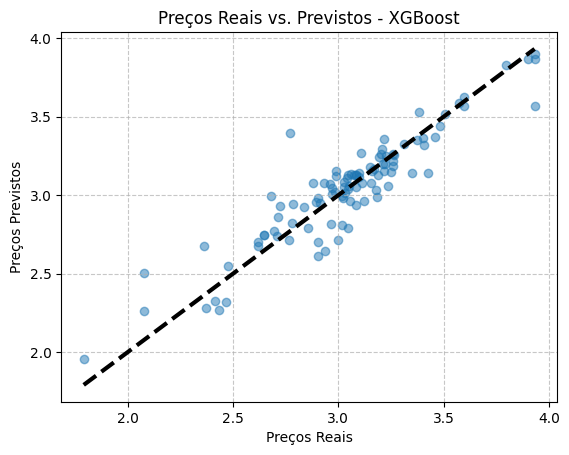

MAE XGBoost: 0.10447702030182286
R² XGBoost: 0.8463257559894972


In [5]:
import matplotlib.pyplot as plt  # Adicionado explicitamente
from sklearn.metrics import mean_absolute_error, r2_score  # Já importado antes, mas mantido para contexto

# Gráfico de dispersão
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
min_val = min(y_test.min(), y_pred_xgb.min())
max_val = max(y_test.max(), y_pred_xgb.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=3)  # Linha preta mais visível
plt.xlabel('Preços Reais')
plt.ylabel('Preços Previstos')
plt.title('Preços Reais vs. Previstos - XGBoost')
plt.grid(True, linestyle='--', alpha=0.7)  # Grade para melhor visualização
plt.show()

# Métricas
print("MAE XGBoost:", mean_absolute_error(y_test, y_pred_xgb))
print("R² XGBoost:", r2_score(y_test, y_pred_xgb))

## Exercício

### Exercício complementar opcional
Experimente o dataset California Housing (`from sklearn.datasets import fetch_california_housing`).

Os modelos já haviam sido treinados utilizando os dados do dataset fetch_california_housing, então eu apenas os adaptei para o dataset de Boston, aplicando o logaritmo na variável alvo PRICE novamente. Em resumo, o melhor modelo, em termos de desempenho e com menor erro médio absoluto, foi novamente o XGBoost, com R² de 0,8463257559894972 (84,63%) e MAE de 0,10447702030182286.